<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/examen_2018_2_03_1085322974.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%pylab inline  


Populating the interactive namespace from numpy and matplotlib


Haciendo 
$$
U=\begin{bmatrix}
U_0\\
U_1\\
U_2\\
U_3
\end{bmatrix}=\begin{bmatrix}
\theta\\
\frac{d\theta}{dt}\\
L\\
\frac{dL}{dt}
\end{bmatrix}.
$$
Podemos obtener
\begin{align}
\frac{\operatorname{d}}{\operatorname{d} t} 
\begin{bmatrix} 
\theta\\
\frac{d\theta}{dt}\\
L\\
\frac{dL}{dt}
\end{bmatrix}=&
\begin{bmatrix}
\frac{d\theta}{dt}\\
-\frac{1}{l_0+L}\begin{bmatrix} g\sin \theta + 2\frac{dL}{dt}\frac{d\theta}{dt}
\end{bmatrix}&\\
\frac{dL}{dt}\\
(l_0+L)\begin{pmatrix}\frac{d\theta}{dt}\end{pmatrix}^{2} - \frac{k}{m} L+ g\cos \theta
\end{bmatrix}\\
\end{align}

\begin{align}
\frac{\operatorname{d}}{\operatorname{d} t} 
U=&
\begin{bmatrix}
U_1\\
-\frac{1}{l_0+U_2}\begin{bmatrix} g\sin(U_0) + 2U_3U_1\end{bmatrix}&\\
U_3\\
(l_0+U_2)(U_1)^2-\frac{k}{m}U_2+g\cos(U_0)
\end{bmatrix}
\end{align}

Para dar solucion a las ecuaciones diferenciales

In [0]:
def dU_dt(U,t,n=3,l_0=0.5):
  """
  U es un vector donde:
  θ= U[0], 
  θ'= U[1], 
  L= U[2], 
  L'= U[3],
  Esta funcion retorna [θ',θ'',L',L'']
  n: cociente entre k/m
  l_0: Longitud del resorte en reposo
  """
  g=9.8 
  return[U[1],
         -(1/(l_0+U[2]))*(g*np.sin(U[0])+2*(U[1]*U[3])),
         U[3],
         (l_0+U[2])*(U[1])**2-n*U[2]+g*np.cos(U[0])]
         

Se tienen las condiciones iniciales $L=1$, $\theta_0=0.3$
partiendo del reposo, es decir: 
$$ \frac{d\theta}{dt} = 0$$

$$\frac{dL}{dt}=0$$

In [0]:
t=np.linspace(0,20,1000)
U0=[0.3,0,1,0] #condiciones iniciales [θ, dθ/dt, L, dL/dt]

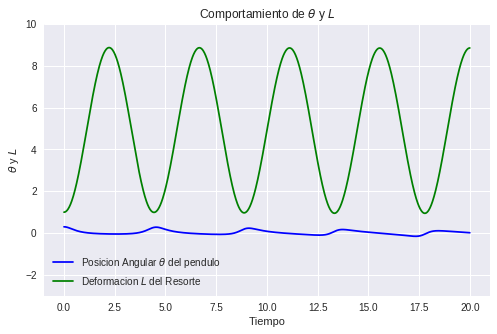

In [4]:
Us=integrate.odeint(dU_dt,U0,t,args=(2,0.5)) #args=(k/m,l_0)
L=Us[:,2];θ=Us[:,0]
plt.figure( figsize = (8,5) )
plt.plot(t,θ,"b",label="Posicion Angular $\\theta$ del pendulo")
plt.plot(t,L,"g",label="Deformacion $L$ del Resorte")
plt.xlabel("Tiempo")
plt.ylabel("$\\theta$ y $L$")
plt.ylim(-3,10)
plt.title( "Comportamiento de $\\theta$ y $L$" )
plt.legend(loc="best")


Cambiando un poco las condiciones iniciales
$$\theta_0=0.8 rad$$
$$L=0.7$$ 

In [0]:
Ui=[0.8,0,0.7,0]

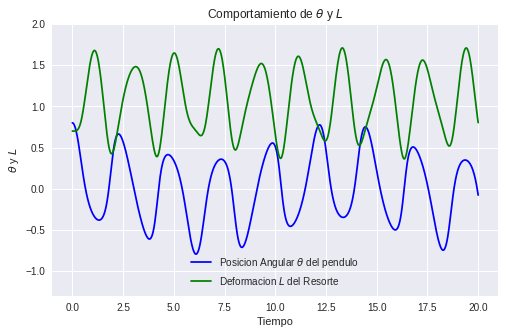

In [7]:
Us = integrate.odeint(dU_dt, Ui, t,args=(10,0.5) )  #args=(k/m,l_0)
plt.figure( figsize = (8,5) )
plt.plot(t,Us[:,0], "b",label="Posicion Angular $\\theta$ del pendulo")
plt.plot(t,Us[:,2],"g",label="Deformacion $L$ del Resorte")
plt.xlabel("Tiempo")
plt.ylabel("$\\theta$ y $L$")
plt.ylim(-1.3,2)
plt.title("Comportamiento de $\\theta$ y $L$" )
plt.legend(loc="lower center")


## **Movimiento en el plano XY**



Ecucaciones de las coordenadas x, y del movimiento del sistema en el plano

$$x=(L_0+L)\sin( \theta)$$
$$y=-(L_0+L)\cos( \theta)$$

Se tienen las condiciones iniciales $L_o=1$, $\theta_0=0.3$
partiendo del reposo, es decir: 
$$ \frac{d\theta}{dt} = 0$$

$$\frac{dL}{dt}=0$$

In [0]:
t=np.linspace(0,50,10000)
U0=[0.3,0,1,0]
Us=integrate.odeint(dU_dt,U0,t,args=(2,0.5)) #arg=(k/m,l_0)
L=Us[:,2]
θ=Us[:,0]
dθ_dt=Us[:,1]

def x(L,θ,l0=0.5):
  x=(l0+L)*np.sin(θ)
  return x

def y(L,θ,l0=0.5):
  y=-(l0+L)*np.cos(θ)
  return y

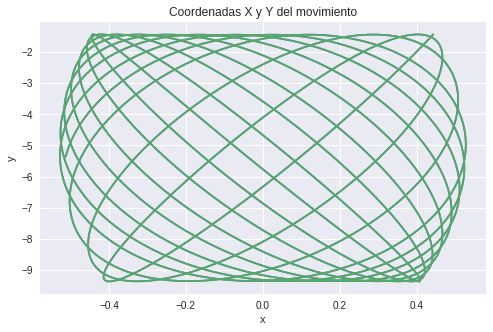

In [9]:
plt.figure( figsize = (8,5) )
plt.plot(x(L,θ),y(L,θ))
plt.xlabel("x")
plt.ylabel("y")
plt.title( "Coordenadas X y Y del movimiento" )
plt.plot(x(L,θ),y(L,θ))

## Cambiando algunas condiciones iniciales

Se tienen las condiciones iniciales  $\theta_0=0.8$, $L_o=0.7$,
partiendo del reposo: 
$$ \frac{d\theta}{dt} = 0$$

$$\frac{dL}{dt}=0$$

Text(0.5,1,'Coordenadas X y Y del movimiento')

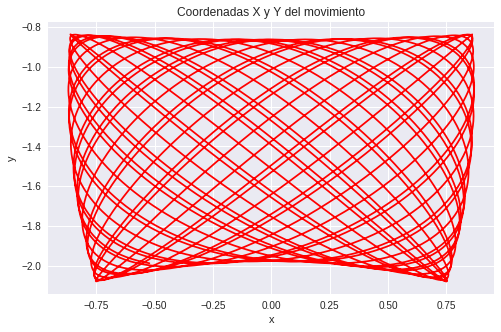

In [0]:
t=np.linspace(0,50,10000)
Ui=[0.8,0,0.7,0]
Us=integrate.odeint(dU_dt,Ui,t,args=(10,0.5)) #arg=(k/m,l_0)
L=Us[:,2]
θ=Us[:,0]

plt.figure( figsize = (8,5) )
plt.plot(x(L,θ),y(L,θ),"r")
plt.xlabel("x")
plt.ylabel("y")
plt.title( "Coordenadas X y Y del movimiento" )


Se tienen las condiciones iniciales  $\theta_0=0.8$, $L_o=0.7$,
partiendo del reposo: 
$$ \frac{d\theta}{dt} = 0$$

$$\frac{dL}{dt}=0$$

Text(0.5,1,'Coordenadas X y Y del movimiento')

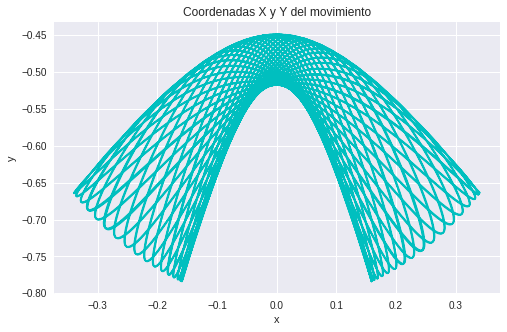

In [0]:
t=np.linspace(0,50,10000)
Ui=[0.2,0,0.3,0]
Us=integrate.odeint(dU_dt,Ui,t,args=(80,0.5)) #arg=(k/m,l_0)
L=Us[:,2]
θ=Us[:,0]

plt.figure( figsize = (8,5) )
plt.plot(x(L,θ),y(L,θ),"c")
plt.xlabel("x")
plt.ylabel("y")
plt.title( "Coordenadas X y Y del movimiento" )


## **Espacio de configuraciones** $\theta$, $\omega$

Para el espacio de configuraciones se van a generar 10000 valores aleatorios para cada una de las cuatro varibles para las condiciones inciales del sistema

$\theta,\frac{d\theta}{dt},L,\frac{dL}{dt}$



In [0]:
Nic=1000

theta0s = np.random.uniform(-0.3,0.3,Nic)
omega0s = np.random.uniform(-1,1,Nic)
L0s=np.random.uniform(0,1,Nic)
dL0s=np.random.uniform(-1,1,Nic)


Los valores escogidos para el sistema son:

masa $m=0.5$ kg 

constante elastica $k=1$ 

Longitud inicial del resorte $l_0=0.5$m

Text(0.5,1,'Espacio de configuraciones')

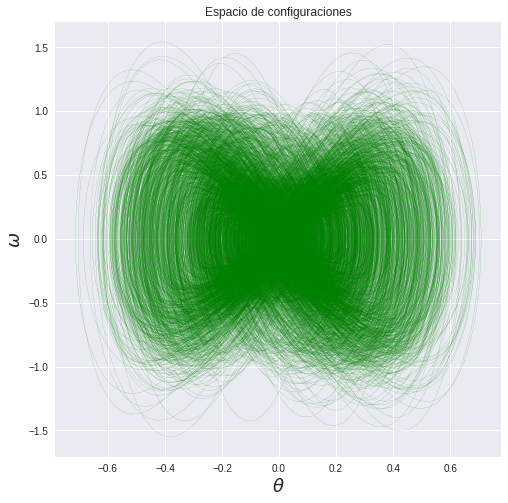

In [0]:
tmax = 20
j=0
plt.figure( figsize = (8,8) )
for theta0,omega0,L0,dL in zip(theta0s,omega0s,L0s,dL0s):
    t=np.linspace(0,tmax,1000)
    U0=[theta0,omega0,L0,dL]
    Ui=integrate.odeint(dU_dt,U0,t,args=(2,0.5)) #arg=(k/m,L_0)
    plt.plot(Ui[:,0],Ui[:,1],lw = 0.1, color = "green" )
    if j==Nic: 
        break
    j=j+1
    
plt.xlabel("$\\theta$", fontsize = 18 )
plt.ylabel("$\omega$", fontsize = 18 )
plt.title("Espacio de configuraciones")
   

## Cambiando los valores escogidos para el sistema y los valores aletorios:

masa  $𝑚=0.05$  kg

constante* elastica  $𝑘=0.5$

Longitud inicial del resorte  $𝑙_0$=0.5 m

In [0]:
theta0s = np.random.uniform(-0.7,0.7,Nic)
omega0s = np.random.uniform(-2,2,Nic)
L0s=np.random.uniform(0,0.5,Nic)
dL0s=np.random.uniform(-1,1,Nic)

Text(0.5,1,'Espacio de configuraciones')

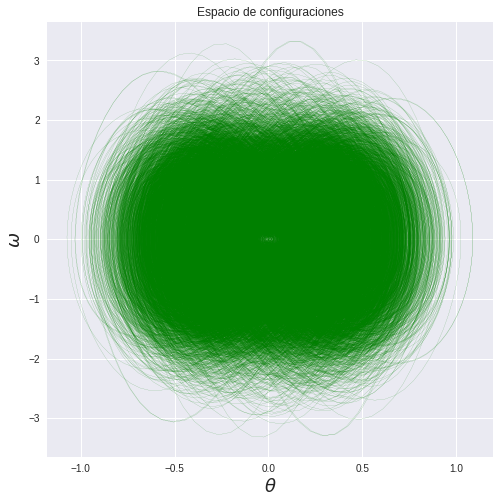

In [0]:
tmax = 20
j=0
plt.figure( figsize = (8,8) )
for theta0,omega0,L0,dL in zip(theta0s,omega0s,L0s,dL0s):
    t=np.linspace(0,tmax,1000)
    U0=[theta0,omega0,L0,dL]
    Ui=integrate.odeint(dU_dt,U0,t,args=(10,0.5)) #arg=(k/m,L_0)
    plt.plot(Ui[:,0],Ui[:,1],lw = 0.1, color = "green" )
    if j==Nic: 
        break
    j=j+1
    
plt.xlabel("$\\theta$", fontsize = 18 )
plt.ylabel("$\omega$", fontsize = 18 )
plt.title("Espacio de configuraciones" )
   